# Zufallsvariable und Wahrscheinlichkeiten

Sei $X$ eine stetige Zufallsvariable, die Werte größer oder gleich 1 annimmt und $f(x) = 1/x^2$ die zugehörige Dichtefunktion.

In [1]:
%matplotlib inline

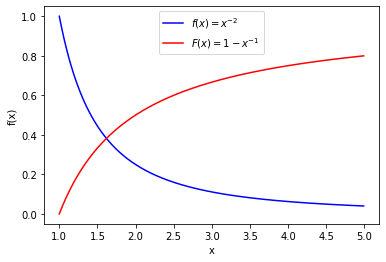

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
x = np.arange(1.0,5.0,0.01)
y1 = 1.0/x**2
plt.plot(x,y1,'b-',label=r'$f(x) = x^{-2}$')
y2 = 1 - 1.0/x
plt.plot(x,y2,'r-',label=r'$F(x) = 1 - x^{-1}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper center')
plt.show()

Die Wahrscheinlichkeit, dass $X$ einen Wert annimmt, der Im Intervall $[m,m+0.5[$, $m \in \mathbb{N}$, liegt, ist
$$ P(m \le X < m+0.5) = \int_m^{m+0.5} f(x) \; dx = F(m+0.5) - F(m) = -\frac{1}{m+0.5} + \frac{1}{m} $$

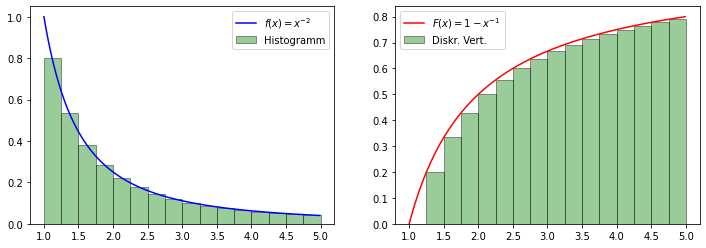

In [3]:
dx = 0.25
m = np.arange(1,5.0,dx)
ym = (-1.0/(m+dx) + 1.0/m)/dx
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.plot(x,y1,'b-',label=r'$f(x) = x^{-2}$')
ax1.bar(m, ym, width=dx, alpha=0.4, color='g', label='Histogramm', align='edge', edgecolor='black', linewidth=1.0)
#ax1.xlabel('x')
ax1.legend()
ax2.plot(x,y2,'r-',label=r'$F(x) = 1 - x^{-1}$')
ym_kumuliert = (1 - 1.0/m)
ax2.bar(m, ym_kumuliert, width=dx, alpha=0.4, color='g', label='Diskr. Vert.', align='edge', edgecolor='black', linewidth=1.0)
ax2.legend(loc='upper left')
plt.show()

# Die Inversionsmethode

Die Inversionsmethode ist ein Simulationsverfahren, um aus gleichverteilten Zufallszahlen andere Wahrscheinlichkeitsverteilungen zu erzeugen.

1. Für eine stetige Verteilungsfunktion $y = F(x)$ bildet man die Umkehrfunktion $F^{-1}(y) = x$.
2. Man nehme eine auf $[0,1]$ gleichverteilte Zufallsvariable $Y$.
3. $X = F^{-1}(Y)$ ist dann eine Zufallsvariable, die der Verteilungsfunktion $F(x)$ genügt.

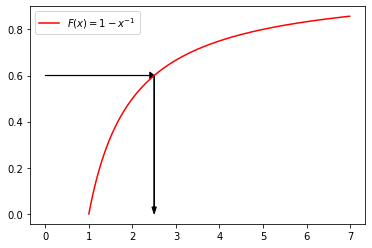

In [4]:
fig, ax = plt.subplots()
x = np.arange(1.0,7.0,0.01)
y = 1 - 1.0/x
ax.plot(x,y,'r-',label=r'$F(x) = 1 - x^{-1}$')
ax.arrow(0, 0.6, 1/(1-0.6) - 0.1, 0.0, head_width=0.03, head_length=0.1, fc='k', ec='k')
ax.arrow(1/(1-0.6), 0.6, 0.0, -0.6 + 0.03, head_width=0.1, head_length=0.03, fc='k', ec='k')
ax.legend(loc='upper left')
plt.show()

In [5]:
from random import random

class Zufallsvariable(object):
    
    def __init__(self, f_inv):
        self.f_inv = f_inv  # inverse Verteilungsfunktion F^(-1)(y)
        
    def X(self):
        r = random()  # gleichverteilte Zufallszahl in [0,1[
        return self.f_inv(r)
    
# inverse Verteilungsfunktion von y=F(x)=1-1/x ist F^(-1)(y) = 1/(1-y)
zv = Zufallsvariable(lambda y: 1/(1-y))
[zv.X() for _ in range(4)]

[2.5438723846341142, 3.260219531166348, 9.54907650019542, 5.337144572956638]

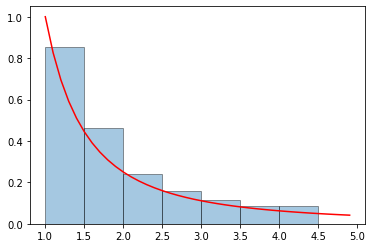

In [11]:
plt.hist([zv.X() for _ in range(1000)], bins=np.arange(1,5,0.5), density=True, edgecolor='k', alpha=0.4)
plt.plot(np.arange(1,5,0.1), np.arange(1,5,0.1)**(-2), 'r-');